# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

## BUSINESS UNDERSTANDING

This project seeks to analyse demographics data for customers of a mail-orer sales company to identify parts of the popultation that describe the core customer base of the company. Use that information to target individuals that are most likely to convert into becoming a customer for the company.

To achieve this we need to answer the following questions:


1. What segment of the population can be targeted for the company?
2. What individual characteristics are most likely to convert to being a customer of the company?




## DATA UNDERSTANDING

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

In [97]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import Imputer

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline



# magic word for producing visualizations in notebook
%matplotlib inline

### Gather

load libraries, modules and dataset 

In [2]:
# load in the data
azdias = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
azdias.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [8]:
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


### ACCESS

Perform descriptive data analysis to get to know the format sctructure and nature of the dataset in question

First we want to access the dataset for the general population

In [3]:
azdis_shape = azdias.shape

print('the shape of the dataset is {} with {} rows and {} columns'.format(azdis_shape, azdis_shape[0], azdis_shape[1]))

the shape of the dataset is (891221, 366) with 891221 rows and 366 columns


Running the processes below takes forever, so will slice the data and take 50% for the rest of the process

In [4]:
take_50 = math.ceil(((azdis_shape[0]*50) / 100))

In [11]:
take_50

445611

In [5]:
azdias =azdias.head(take_50)
customers = customers.head(take_50)

In [10]:
print('get the datatypes of the columns')
azdias.dtypes.unique()

get the datatypes of the columns


array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [11]:
# select numeric colums

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

azdis_numeric_df = azdias.select_dtypes(include=numerics)

In [12]:
azdis_numeric_df.columns

Index(['LNR', 'AGER_TYP', 'AKT_DAT_KL', 'ALTER_HH', 'ALTER_KIND1',
       'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'ALTERSKATEGORIE_FEIN',
       'ANZ_HAUSHALTE_AKTIV',
       ...
       'VHN', 'VK_DHT4A', 'VK_DISTANZ', 'VK_ZG11', 'W_KEIT_KIND_HH',
       'WOHNDAUER_2008', 'WOHNLAGE', 'ZABEOTYP', 'ANREDE_KZ',
       'ALTERSKATEGORIE_GROB'],
      dtype='object', length=360)

The names for the columns don't make sense. So we will use the discription of the data to match and replace the column names

In [13]:
azdis_numeric_df.describe()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
count,8.912210e+05,891221.000000,817722.000000,817722.000000,81058.000000,29499.000000,6170.000000,1205.000000,628274.000000,798073.000000,...,770025.000000,815304.000000,815304.000000,815304.000000,783619.000000,817722.000000,798073.000000,891221.000000,891221.000000,891221.000000
mean,6.372630e+05,-0.358435,4.421928,10.864126,11.745392,13.402658,14.476013,15.089627,13.700717,8.287263,...,2.417322,6.001214,7.532130,5.945972,3.933406,7.908791,4.052836,3.362438,1.522098,2.777398
std,2.572735e+05,1.198724,3.638805,7.639683,4.097660,3.243300,2.712427,2.452932,5.079849,15.628087,...,1.166572,2.856091,3.247789,2.771464,1.964701,1.923137,1.949539,1.352704,0.499512,1.068775
min,1.916530e+05,-1.000000,1.000000,0.000000,2.000000,2.000000,4.000000,7.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,4.144580e+05,-1.000000,1.000000,0.000000,8.000000,11.000000,13.000000,14.000000,11.000000,1.000000,...,2.000000,3.000000,5.000000,4.000000,2.000000,8.000000,3.000000,3.000000,1.000000,2.000000
50%,6.372630e+05,-1.000000,3.000000,13.000000,12.000000,14.000000,15.000000,15.000000,14.000000,4.000000,...,2.000000,6.000000,8.000000,6.000000,4.000000,9.000000,3.000000,3.000000,2.000000,3.000000
75%,8.600680e+05,-1.000000,9.000000,17.000000,15.000000,16.000000,17.000000,17.000000,17.000000,9.000000,...,3.000000,9.000000,10.000000,8.000000,6.000000,9.000000,5.000000,4.000000,2.000000,4.000000
max,1.082873e+06,3.000000,9.000000,21.000000,18.000000,18.000000,18.000000,18.000000,25.000000,595.000000,...,4.000000,11.000000,13.000000,11.000000,6.000000,9.000000,8.000000,6.000000,2.000000,9.000000


From the table we can see that almost all the numeric features have missing values

The values in the features are normally spread

Some features have outlier, for example  the ANZ_HAUSHALTE_AKTIV column has a 75th percentile value of 9.0 and a max of 595. definately an outlier. May need more insight to prove this later

Now let's take a look at the customer data

The CUSTOMERS dataframe contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP')

In [14]:
customers_shape = customers.shape

print('the shape of the dataset is {} with {} rows and {} columns'.format(customers_shape, customers_shape[0], customers_shape[1]))

the shape of the dataset is (191652, 369) with 191652 rows and 369 columns


Let's take a look at these 4 columns in the customer dataframe

In [15]:
main_feat_customer =  customers[['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP']]

In [16]:
main_feat_customer.head()

,CUSTOMER_GROUP,ONLINE_PURCHASE,PRODUCT_GROUP
0,MULTI_BUYER,0,COSMETIC_AND_FOOD
1,SINGLE_BUYER,0,FOOD
2,MULTI_BUYER,0,COSMETIC_AND_FOOD
3,MULTI_BUYER,0,COSMETIC
4,MULTI_BUYER,0,FOOD


In [17]:
main_feat_customer.nunique()

CUSTOMER_GROUP     2
ONLINE_PURCHASE    2
PRODUCT_GROUP      3
dtype: int64

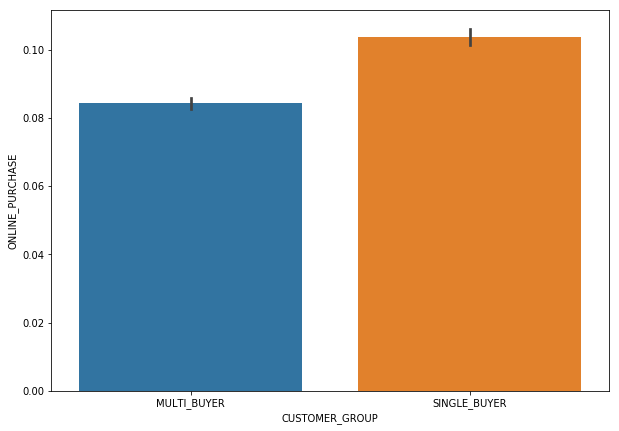

In [18]:
# What groups had the most purchase
plt.figure(figsize=(10,7))

sns.barplot(data=main_feat_customer, x='CUSTOMER_GROUP', y='ONLINE_PURCHASE')


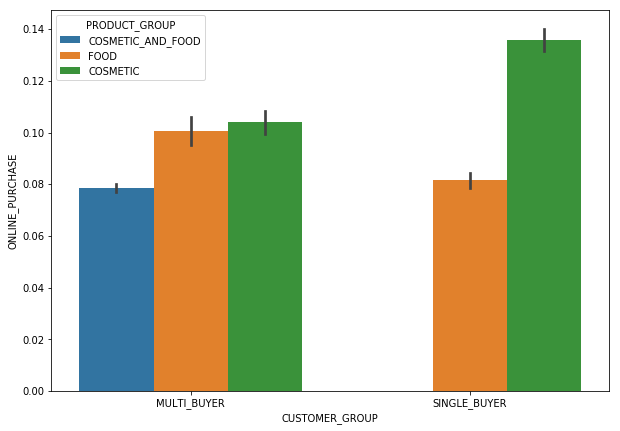

In [19]:
# what do customers buy most
plt.figure(figsize=(10,7))
sns.barplot(x='CUSTOMER_GROUP', y='ONLINE_PURCHASE', hue="PRODUCT_GROUP", data=main_feat_customer);

We could see from the graph that single customer group pruchase cosmetics products.

Even with the multi buyer group of customers, costmetic products where purchased the more

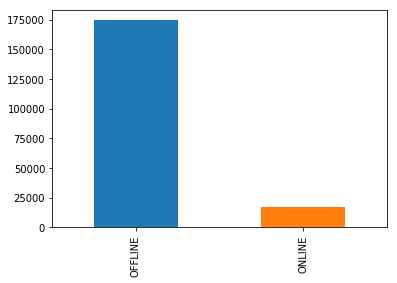

In [20]:
customers['ONLINE_PURCHASE'].replace({0: "OFFLINE", 1: "ONLINE"}).value_counts().plot(kind='bar')

there are more customers who made purchase offline than online

In [21]:
# calculate the percent null of each column
percen_null = azdias.isnull().sum()/ azdias.shape[0]

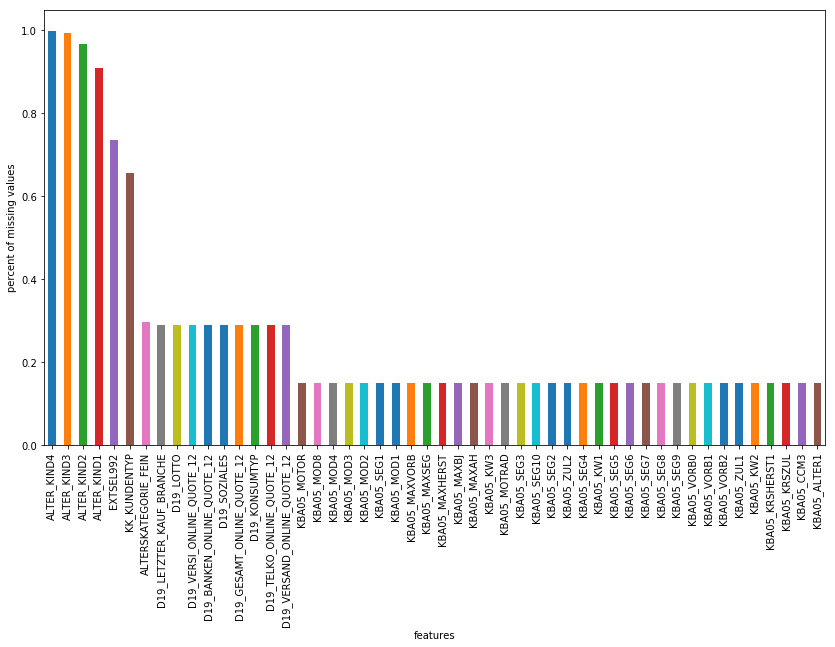

In [22]:
# select fisrt 50 columns an dispay their percent null in descending order
plt.figure(figsize=(14,8))
percen_null.sort_values(ascending=False)[:50].plot(kind='bar')
plt.ylabel('percent of missing values');
plt.xlabel('features');
#plt.savefig('feature_missing_values.png', dpi=500, bbox_inches='tight', pad_inches=0, transparent=True)


In [23]:
# columns whose percent null is greater than 50%
percen_null[percen_null > .5]

ALTER_KIND1     0.909048
ALTER_KIND2     0.966900
ALTER_KIND3     0.993077
ALTER_KIND4     0.998648
EXTSEL992       0.733996
KK_KUNDENTYP    0.655967
dtype: float64

In [24]:
# columns whose percent null is less than 10 percent
percen_null[percen_null < .1]

LNR                         0.000000
AGER_TYP                    0.000000
AKT_DAT_KL                  0.082470
ALTER_HH                    0.082470
ANZ_KINDER                  0.082470
ANZ_PERSONEN                0.082470
ANZ_TITEL                   0.082470
CJT_GESAMTTYP               0.005446
CJT_KATALOGNUTZER           0.005446
CJT_TYP_1                   0.005446
CJT_TYP_2                   0.005446
CJT_TYP_3                   0.005446
CJT_TYP_4                   0.005446
CJT_TYP_5                   0.005446
CJT_TYP_6                   0.005446
D19_BANKEN_ANZ_12           0.000000
D19_BANKEN_ANZ_24           0.000000
D19_BANKEN_DATUM            0.000000
D19_BANKEN_DIREKT           0.000000
D19_BANKEN_GROSS            0.000000
D19_BANKEN_LOKAL            0.000000
D19_BANKEN_OFFLINE_DATUM    0.000000
D19_BANKEN_ONLINE_DATUM     0.000000
D19_BANKEN_REST             0.000000
D19_BEKLEIDUNG_GEH          0.000000
D19_BEKLEIDUNG_REST         0.000000
D19_BILDUNG                 0.000000
D

In [25]:
# columns whose percent null is between 20 and 50 percent
percen_null[(percen_null < .5) & (percen_null > .1) ]

ALTERSKATEGORIE_FEIN           0.295041
ANZ_HAUSHALTE_AKTIV            0.104517
ANZ_HH_TITEL                   0.108848
ANZ_STATISTISCHE_HAUSHALTE     0.104517
ARBEIT                         0.109082
BALLRAUM                       0.105182
CAMEO_DEU_2015                 0.111060
CAMEO_DEUG_2015                0.111060
CAMEO_INTL_2015                0.111060
D19_BANKEN_ONLINE_QUOTE_12     0.288495
D19_GESAMT_ONLINE_QUOTE_12     0.288495
D19_KONSUMTYP                  0.288495
D19_LETZTER_KAUF_BRANCHE       0.288495
D19_LOTTO                      0.288495
D19_SOZIALES                   0.288495
D19_TELKO_ONLINE_QUOTE_12      0.288495
D19_VERSAND_ONLINE_QUOTE_12    0.288495
D19_VERSI_ONLINE_QUOTE_12      0.288495
DSL_FLAG                       0.104517
EINGEFUEGT_AM                  0.104517
EWDICHTE                       0.105182
FIRMENDICHTE                   0.104525
GEBAEUDETYP                    0.104517
GEBAEUDETYP_RASTER             0.104525
GEMEINDETYP                    0.109147


Check the number of attribute for each feature.
For this and many more insights we want to load in the feature info file to better understand our data

In [6]:
# load in the info files

features_info = pd.read_excel('DIAS Attributes - Values 2017.xlsx',\
                              sheet_name='Tabelle1', index_col=[0, 1, 2]).reset_index()

features_info.drop('level_0', axis=1, inplace=True)

features_info_levels = pd.read_excel('DIAS Information Levels - Attributes 2017.xlsx', header=1, index_col=[0, 1]).reset_index()
features_info_levels.drop('level_0', axis=1, inplace=True) 

features_info.head()

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,AGER_TYP,best-ager typology,0,no classification possible
2,AGER_TYP,best-ager typology,1,passive elderly
3,AGER_TYP,best-ager typology,2,cultural elderly
4,AGER_TYP,best-ager typology,3,experience-driven elderly


In [27]:
features_info[features_info.Attribute=='AGER_TYP']

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,AGER_TYP,best-ager typology,0,no classification possible
2,AGER_TYP,best-ager typology,1,passive elderly
3,AGER_TYP,best-ager typology,2,cultural elderly
4,AGER_TYP,best-ager typology,3,experience-driven elderly


Find out how many features from the azdias dataframe we have in the features info

In [28]:
featrues_we_have_info = np.intersect1d(np.array(azdias.columns),features_info.Attribute.unique(), assume_unique = True)

In [29]:
features_we_dont_have_info =  np.setdiff1d(np.array(azdias.columns),features_info.Attribute.unique(), assume_unique = True)

So far we want to concentrate on the features we have info about and check the number of unique attribute each feature has

In [30]:
# get the features we have info about
feat_info_azdias= features_info[features_info.Attribute.isin(featrues_we_have_info)]

In [31]:
feat_info_azdias.head()

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,AGER_TYP,best-ager typology,0,no classification possible
2,AGER_TYP,best-ager typology,1,passive elderly
3,AGER_TYP,best-ager typology,2,cultural elderly
4,AGER_TYP,best-ager typology,3,experience-driven elderly


In [32]:
# now for each unique attribut we want to count the number of unique values they have
unique_feat_table = dict({})

for att in feat_info_azdias.Attribute:
    if att not in unique_feat_table.keys():
        unique_feat_table[att] = 0
    unique_feat_table[att] += 1
    

unique_feat_df = pd.DataFrame.from_dict(unique_feat_table,orient='index')

In [33]:
unique_feat_df.head()

,0
AGER_TYP,5
ALTERSKATEGORIE_GROB,6
ALTER_HH,22
ANREDE_KZ,3
ANZ_HAUSHALTE_AKTIV,1


In [34]:
unique_feat_df.columns

RangeIndex(start=0, stop=1, step=1)

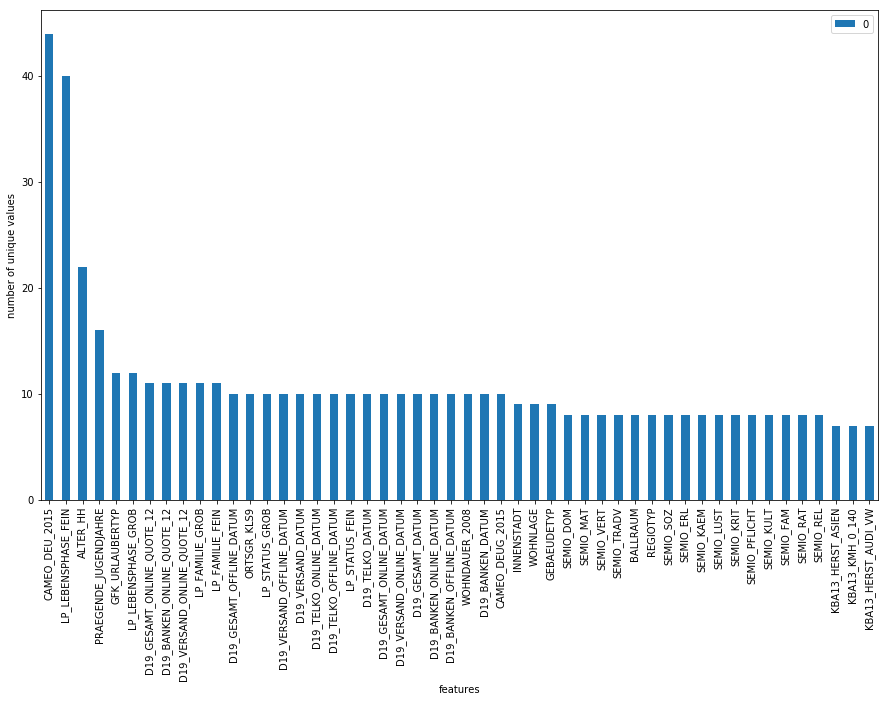

In [35]:
# lets plot them and see

unique_feat_df.sort_values(0,ascending=False)[:50].plot(kind='bar', figsize=(15,9))
plt.ylabel('number of unique values');
plt.xlabel('features');

From the graph we see that some features have too many unique values which might not help in our analysis. so we have to clean them later

Now from the features info, we want to get the features that have unknown values

In [4]:
# get values that are unkown from the info data
unknown_vals =  features_info[features_info.Value.isin([-1,0])].Meaning.unique()
unknown_vals

array(['unknown', 'no classification possible',
       'unknown / no main age detectable', 'no company in the building',
       'no transactions known', 'no transaction known',
       'no Online-transactions within the last 12 months',
       "doesn't belong to the green avantgarde",
       'classification not possible', 'none', 'no 1-2 family homes',
       'no 3-5 family homes', 'no 6-10 family homes',
       'no >10 family homes', 'external supplied hedonists ',
       'no small office/home office', 'no score calculated'], dtype=object)

In [37]:
# select rows that we have info about and have missing values
info_azdias = features_info[(features_info.Attribute.isin(featrues_we_have_info))\
                            & (features_info.Meaning.isin(unknown_vals))]

In [38]:
info_azdias.head()

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,AGER_TYP,best-ager typology,0,no classification possible
5,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown
11,ALTER_HH,main age within the household,0,unknown / no main age detectable
33,ANREDE_KZ,gender,"-1, 0",unknown


In [7]:
# get features with no null values

features_info = features_info[~features_info['Value'].isna()]
features_info.head()

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
1,AGER_TYP,best-ager typology,0,no classification possible
2,AGER_TYP,best-ager typology,1,passive elderly
3,AGER_TYP,best-ager typology,2,cultural elderly
4,AGER_TYP,best-ager typology,3,experience-driven elderly


In [17]:
# split the value column into list -> if value is -1,0 then make it [-1,0]
features_info.Value = [ str(i).split(',') for i in features_info.Value]

In [41]:
azdias['ANZ_HAUSHALTE_AKTIV'].head()

0     NaN
1    11.0
2    10.0
3     1.0
4     3.0
Name: ANZ_HAUSHALTE_AKTIV, dtype: float64

### CLEAN

clean the dataset by perform the following duties:
* Convert features to right data formats
* Remove features with no variability
* Drop duplicated
* Drop nulls or fill nulls
* e.t.c

In [8]:
# Convert missing or unknown values to NaNs
for col in azdias.columns:
    try:
        if col in features_info.index.tolist():
            index = azdias[col].isin(features_info.at[col, 'Value'].tolist()[0])
            azdias.loc[index,col] = np.Nan
            #azdias.at[index, col] = np.NaN
    except:
        print('error:', col)    

Now, we have to see the percent missing values in the general population dataset and remove them

In [19]:
null_azdias = azdias.isnull().sum() / azdias.shape[0] * 100

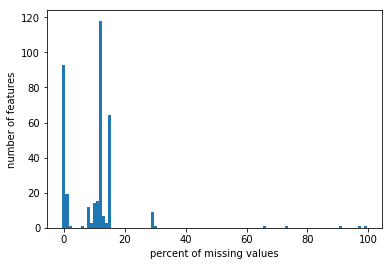

In [43]:

plt.hist(null_azdias, np.arange(min(null_azdias)-0.5, max(null_azdias)+0.5) )
plt.xlabel('percent of missing values')
plt.ylabel('number of features')
plt.savefig('missing_values.png', dpi=500, bbox_inches='tight', pad_inches=0)
plt.show()

We can see that there are a lot of columns with higher null values. So we need to remove them

In [20]:
# Remove the outlier columns from the dataset. 
col_outlier = null_azdias[null_azdias > 30].index


In [13]:
# Show column outliers
col_outlier

Index(['ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'EXTSEL992',
       'KK_KUNDENTYP'],
      dtype='object')

In [ ]:
# drop the outlier columns
try:
    customers.drop(columns= [col_outlier], axis=1, inplace=True)
    azdias.drop(columns= [col_outlier], axis=1, inplace=True)
except:
    print('error:', col)    

Drop Duplicated rows in each feature set

In [47]:
# get the number of duplicated column

duplicated_cols = azdias.duplicated()

In [48]:
duplicated_cols.sum()

0

In [49]:
# drop duplicates
azdias.drop_duplicates(inplace=True)
customers.drop_duplicates(inplace=True)

Remove Outliers based on higher distinct values in features

In [51]:
# Now, we need to also remove the outlier attributes from feature_info
feat_info_new = features_info[features_info.index.isin(col_outlier) == False]
feat_info_new.shape

(2258, 4)

Remove featues with too many distinct values

In [8]:

# Drop features with too many distinct values 
drop_columns = ['AGER_TYP', 'LNR', 'LP_FAMILIE_GROB', 'ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4',
                'VERDICHTUNGSRAUM', 'EXTSEL992','EINGEFUEGT_AM', 'LP_STATUS_GROB', 'KBA05_BAUMAX', 'KK_KUNDENTYP',
               'GEBURTSJAHR', 'ALTER_HH', 'TITEL_KZ']

try:
    azdias.drop(columns= [drop_columns], axis=1, inplace=True)
    customers.drop(columns= [drop_columns], axis=1, inplace=True)

except:
    print('error:')
customers.drop(['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'], axis=1, inplace=True)

error:


Now we want to re-encode values in features

In [9]:
azdias['OST_WEST_KZ'] = azdias['OST_WEST_KZ'].replace({'O':1.0, 'W':2.0})
customers['OST_WEST_KZ'] = customers['OST_WEST_KZ'].replace({'O':1.0, 'W':2.0})

In [10]:

azdias['CAMEO_DEUG_2015'] = azdias['CAMEO_DEUG_2015'].replace({'X':np.NaN})
azdias['CAMEO_INTL_2015'] = azdias['CAMEO_INTL_2015'].replace({'XX':np.NaN})

customers['CAMEO_DEUG_2015'] = customers['CAMEO_DEUG_2015'].replace({'X':np.NaN})
customers['CAMEO_INTL_2015'] = customers['CAMEO_INTL_2015'].replace({'XX':np.NaN})

In [11]:
azdias['CAMEO_DEUG_2015'] = azdias['CAMEO_DEUG_2015'].astype('float')
customers['CAMEO_DEUG_2015'] = customers['CAMEO_DEUG_2015'].astype('float')

Create Dummy variables for categorical columns in both demographic dataset 

In [12]:
categorical = ['CJT_GESAMTTYP',
                   'FINANZTYP',
                   'GFK_URLAUBERTYP',
                   'LP_FAMILIE_FEIN',
                   'LP_STATUS_FEIN',
                   'NATIONALITAET_KZ',
                   'SHOPPER_TYP',
                   'ZABEOTYP',
                   'GEBAEUDETYP',
                   'CAMEO_DEUG_2015',
                   'D19_KONSUMTYP',
                   'D19_LETZTER_KAUF_BRANCHE',
                   'ALTERSKATEGORIE_FEIN',
                   'EINGEZOGENAM_HH_JAHR',
                   'GEMEINDETYP',
                   'STRUKTURTYP',              
                   'LP_LEBENSPHASE_GROB', 
                   'CAMEO_DEU_2015',
                   'WOHNLAGE']

In [13]:
azdias = pd.get_dummies(azdias, columns=categorical)  
customers = pd.get_dummies(customers, columns=categorical)


In [14]:
azdias['CAMEO_INTL_2015'] = azdias['CAMEO_INTL_2015'].astype('float')
customers['CAMEO_INTL_2015'] = customers['CAMEO_INTL_2015'].astype('float')

In [15]:

if 'EINGEZOGENAM_HH_JAHR_1986.0' in customers.columns:
    customers.drop('EINGEZOGENAM_HH_JAHR_1986.0', axis=1, inplace=True)

if 'EINGEZOGENAM_HH_JAHR_1986.0' in azdias.columns:
    azdias.drop('EINGEZOGENAM_HH_JAHR_1986.0', axis=1, inplace=True)

In [16]:
# fill na values with a dummy number -999

azdias.fillna(-999 , inplace=True)
customers.fillna(-999 , inplace=True)

In [22]:
azdias.select_dtypes(include=['object']).head()

,EINGEFUEGT_AM
0,-999
1,1992-02-10 00:00:00
2,1992-02-12 00:00:00
3,1997-04-21 00:00:00
4,1992-02-12 00:00:00


In [23]:
try:
    customers.drop('EINGEFUEGT_AM', axis=1, inplace=True)
    azdias.drop('EINGEFUEGT_AM', axis=1, inplace=True)
except:
    print('error:')    

In [204]:


# Check for missing column 
miss_col = list(np.setdiff1d(azdias.columns, customers.columns))
print(miss_col)

for col in miss_col:
    try:
        azdias.drop(col, axis=1 ,inplace=True)
    except:
        print(col)
    

['ALTERSKATEGORIE_FEIN_1.0', 'EINGEZOGENAM_HH_JAHR_1900.0', 'EINGEZOGENAM_HH_JAHR_1904.0']


## DATA PREPARATION



Now we have to put all together into a function for cleaning the dataset for preprocessing when creating the supervised model

In [154]:
def clean_demographics_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    Args:
          1. Demographics DataFrame
    Return:
          Cleaned demographics DataFrame
    """
    for col in df:
        if col == 'RESPONSE':
            print('passing RESPONSE')
            pass
        else: 
            if col in features_info.index.tolist():
                index = df[col].isin(features_info.at[col, 'Value'])
                df.loc[index, col] = np.NaN
        
    # remove selected columns and rows
    drop_columns = ['AGER_TYP', 'LNR', 'LP_FAMILIE_GROB', 'ALTER_KIND1', 'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4',
                'VERDICHTUNGSRAUM', 'EXTSEL992','EINGEFUEGT_AM', 'LP_STATUS_GROB', 'KBA05_BAUMAX', 'KK_KUNDENTYP',
               'GEBURTSJAHR', 'ALTER_HH', 'TITEL_KZ']
    
   
    try:
        df.drop(columns=[drop_columns], axis=1, inplace=True)
    except:
        print('warning: at drop columns with excess unique variables')
        
    # drop outliers        

#     try:
#         df.drop(columns=[col_outlier], axis=1, inplace=True)
#     except:
#         print('warning: at drop outliers')
            
    # select, re-encode, and engineer column values
    if df['OST_WEST_KZ'].dtypes != np.float64:
        df['OST_WEST_KZ'] = df['OST_WEST_KZ'].replace({'O':1.0, 'W':2.0})
    
    if df['CAMEO_DEUG_2015'].dtypes == 'str' or df['CAMEO_DEUG_2015'].dtypes == 'object':
        df['CAMEO_DEUG_2015'] = df['CAMEO_DEUG_2015'].replace({'X':np.NaN})
    if df['CAMEO_INTL_2015'].dtypes == 'str' or df['CAMEO_INTL_2015'].dtypes == 'object':
        df['CAMEO_INTL_2015'] = df['CAMEO_INTL_2015'].replace({'XX':np.NaN})

    # change to float 
    df['CAMEO_DEUG_2015'] = df['CAMEO_DEUG_2015'].astype('float')
    df['CAMEO_INTL_2015'] = df['CAMEO_INTL_2015'].astype('float')

   
    # create dummy variable for categorical columns
    categorical = ['CJT_GESAMTTYP',
                   'FINANZTYP',
                   'GFK_URLAUBERTYP',
                   'LP_FAMILIE_FEIN',
                   'LP_STATUS_FEIN',
                   'NATIONALITAET_KZ',
                   'SHOPPER_TYP',
                   'ZABEOTYP',
                   'GEBAEUDETYP',
                   'CAMEO_DEUG_2015',
                   'CAMEO_DEU_2015',
                   'D19_KONSUMTYP',
                   'ALTERSKATEGORIE_FEIN',
                   'D19_LETZTER_KAUF_BRANCHE',
                   'EINGEZOGENAM_HH_JAHR',
                   'GEMEINDETYP',
                   'STRUKTURTYP',              
                   'LP_LEBENSPHASE_GROB', 
                   'WOHNLAGE']
    
    df_cleaned = pd.get_dummies(df, columns=categorical)
    
    if 'EINGEZOGENAM_HH_JAHR_1986.0' in df.columns:
        df_cleaned.drop('EINGEZOGENAM_HH_JAHR_1986.0', axis=1, inplace=True)
    
    try:
        df_cleaned.drop('EINGEFUEGT_AM', axis=1, inplace=True)
    except:
        print('error:') 
        
    df_cleaned.fillna(-999 , inplace=True)
    
    # Return the cleaned dataframe.
    return df_cleaned

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

In this section we will perform two main operations:

 1. PCA -> Reduce the dimensionality of the data. This would select feature of importance for clustering the data
 2. Perform Clustering(K-mean) on the pca
 

In [205]:
# setup pca and fit to our  data

# we first want to get 3600 features from our component and see how those components better explain our features
# then we will either increase or reduce the number of components to give maximum explainable features 

no_components = 210
pca = PCA(no_components)
azdias_pca = pca.fit_transform(azdias)

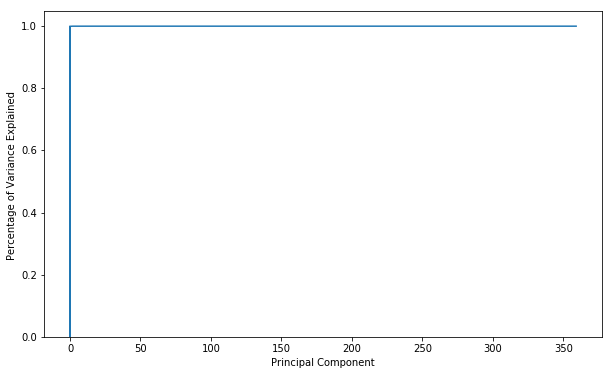

In [206]:
# Analyze the variance accounted for by each principal component.

ind = np.arange(no_components)
vals = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))

ax = plt.subplot()
cumvals = np.cumsum(vals)
ax.bar(ind, vals)
ax.plot(ind, cumvals)

for i in range(no_components):
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Percentage of Variance Explained ")
    
plt.savefig('pca.png', dpi=500, bbox_inches='tight', pad_inches=0)

In [207]:

# Re-apply PCA to the data while selecting for number of components to retain.
sum(pca.explained_variance_ratio_)

0.99999999992119581

Clustering(K-Means)

In [208]:
from sklearn.datasets import make_blobs
#from yellowbrick.cluster import KElbowVisualizer

In [209]:
# Instantiate the clustering model and visualizer
model = MiniBatchKMeans()

In [210]:
optimal_k = 8
kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=15)
model = kmeans.fit(azdias_pca)

In [211]:
preds = model.predict(azdias_pca)

azdias_preds = pd.DataFrame(preds, columns=['General_Population'])

Text(0.5,0,'population group')

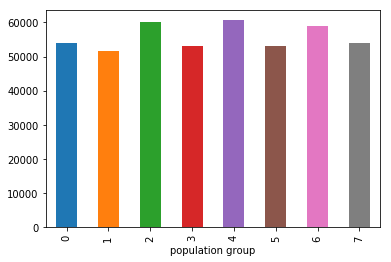

In [212]:
azdias_preds['General_Population'].value_counts().sort_index().plot(kind='bar')

plt.xlabel('population group')

Now, we need to cluster the data

In [213]:
customers_pca = pca.transform(customers)

In [214]:
customers_preds = model.predict(customers_pca)

In [215]:
customers_preds = pd.DataFrame(customers_preds, columns=['Customers_Population'])

In [216]:
data_clusters = pd.concat([customers_preds['Customers_Population'].value_counts(), 
                           azdias_preds['General_Population'].value_counts()], axis=1)

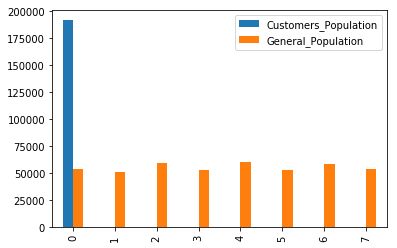

In [217]:
data_clusters.plot(kind='bar')
plt.savefig('clusters_comparison.png', dpi=500, bbox_inches='tight', pad_inches=0)

So now, what are the likely people to become customers?

In [221]:
target_list = azdias_preds[azdias_preds['General_Population'] == 0].index
df_target = azdias.iloc[target_list]
df_target.head(3)

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,CAMEO_DEU_2015_9E,CAMEO_DEU_2015_XX,WOHNLAGE_0.0,WOHNLAGE_1.0,WOHNLAGE_2.0,WOHNLAGE_3.0,WOHNLAGE_4.0,WOHNLAGE_5.0,WOHNLAGE_7.0,WOHNLAGE_8.0
206,225509,-1,1.0,14.0,-999.0,-999.0,-999.0,-999.0,6.0,1.0,...,0,0,0,1,0,0,0,0,0,0
207,225510,1,1.0,15.0,-999.0,-999.0,-999.0,-999.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
208,225518,-1,1.0,0.0,-999.0,-999.0,-999.0,-999.0,3.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [223]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
print('The cluster which is the most overrepresented is cluster {} with a difference of {}.'
         .format(max_index, np.round(max_diff, 4)))

The cluster which is the most overrepresented is cluster 0 with a difference of 0.8789.


## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [120]:
mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [121]:
mailout_train.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,15.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1,1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
2,1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,0.0,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
3,1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,4.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
4,1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,53.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3


In [135]:
mailout_train_size = mailout_train.shape

In [136]:
# Prepare the data using the function created earlier
mailout_train_clean = clean_demographics_data(mailout_train)

passing RESPONSE


In [137]:
mailout_train_clean.shape

(42962, 598)

In [138]:
y = mailout_train_clean['RESPONSE']

In [139]:
# Check for missing column in `clean_mailout_train`
missing = list(np.setdiff1d(mailout_train_clean.columns, azdias.columns))

print(missing)
for col in missing:
    try:
        mailout_train_clean.drop(col, axis=1, inplace=True)
    except :
        print('warning:',col)

['RESPONSE']


Split the data into train test sets

In [141]:
X = mailout_train_clean
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

Build the model

In [146]:
def build_model_randomforest():

    """Build a randomforest model pipeline.
    
    Returns: 
        pipline: sklearn.model_selection.GridSearchCV. Random Forest Classifier.
    """

    # Set machine learning pipeline
    print('Model building.....')
    pipeline = Pipeline([
            ('clf', RandomForestClassifier(n_estimators=20, n_jobs=2))
    ])
        
    parameters = {}
    parameters['clf__n_estimators'] = [5, 10]

    # Set parameters for gird search and set the scoring to roc curve
    cv = GridSearchCV(pipeline, parameters, scoring='roc_auc', n_jobs= 1)

    return cv


model = build_model_randomforest()

Model building.....


In [147]:
print('Train the model...')
model.fit(X_train, y_train)

Train the model...


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__n_estimators': [5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [148]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_val)

accuracy_score(y_val, y_pred)

0.98428953799604324

In [149]:
y_pred = model.predict(X_train)

accuracy_score(y_train, y_pred)

0.99700311327067992

## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [150]:
mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [151]:
mailout_test.shape

(42833, 366)

In [152]:
LNX_indexes = mailout_test['LNR']

In [155]:
# Prepare the data using the function created earlier
mailout_test_clean = clean_demographics_data(mailout_test)

In [156]:

# Check for missing column in `clean_mailout_train`
missing = list(np.setdiff1d(mailout_test_clean.columns, azdias.columns))
print(missing)
for col in missing:
    try:
        mailout_test_clean.drop(col, axis=1, inplace=True)
    except:
        print('warning:', col)

[]


In [157]:
mailout_test_clean.shape

(42833, 597)

In [158]:
azdias.shape

(445611, 600)

In [159]:
# predict on the test
y_final_pred = model.predict(mailout_test_clean)

In [161]:
y_final_pred.shape

(42833,)

In [162]:
LNX_indexes.shape

(42833,)

In [168]:
submission = pd.DataFrame({'LNR':LNX_indexes,'RESPONSE':y_final_pred })

In [172]:

submission.set_index('LNR', inplace=True)
submission.head()

,RESPONSE
LNR,
1754,0
1770,0
1465,0
1470,0
1478,0


In [173]:
submission.columns

Index(['RESPONSE'], dtype='object')

In [174]:
submission.to_csv('submission.csv')